# OCBC HACK it!
## Yeo Bao Shin's analysis on traffic data set (US 2015)



## 1. Loading Data Set and Data Cleasing

In [1]:
# Install library if not installed
# !pip install pandas

# Load library
import pandas as pd

In [2]:
#load data sets and unzip gz file
traffic_station_df = pd.read_csv('dot_traffic_stations_2015.txt.gz', compression='gzip', 
                                 header= None, quotechar='"', sep=',')
traffic_df = pd.read_csv('dot_traffic_2015.txt.gz', compression='gzip', 
                                 header= None, quotechar='"', sep=',')

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,5,7,9,10,15,17,18,20,21,23,25,27,30,31,32,33,34,52,53,54) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,5,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 1.1 Cleaning station data set

In [3]:
#inspect shape of the data frames
print(f'traffic station df shape: {traffic_station_df.shape}')
print(f'traffic df shape: {traffic_df.shape}')

traffic station df shape: (28467, 55)
traffic df shape: (7140392, 38)


In [4]:
# change the max visible column width to 55
pd.set_option('display.max_columns', 55)

In [5]:
#visualise first 5 rows of the traffic station data frame
traffic_station_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,algorithm_of_vehicle_classification,algorithm_of_vehicle_classification_name,calibration_of_weighing_system,calibration_of_weighing_system_name,classification_system_for_vehicle_classification,concurrent_route_signing,concurrent_signed_route_number,direction_of_travel,direction_of_travel_name,fips_county_code,fips_state_code,functional_classification,functional_classification_name,hpms_sample_identifier,hpms_sample_type,lane_of_travel,lane_of_travel_name,latitude,longitude,lrs_identification,lrs_location_point,method_of_data_retrieval,method_of_data_retrieval_name,method_of_traffic_volume_counting,method_of_traffic_volume_counting_name,method_of_truck_weighing,method_of_truck_weighing_name,method_of_vehicle_classification,method_of_vehicle_classification_name,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,number_of_lanes_monitored_for_vehicle_class,posted_route_signing,posted_signed_route_number,previous_station_id,primary_purpose,primary_purpose_name,record_type,sample_type_for_traffic_volume,sample_type_for_traffic_volume_name,sample_type_for_truck_weight,sample_type_for_truck_weight_name,sample_type_for_vehicle_classification,sample_type_for_vehicle_classification_name,second_type_of_sensor,shrp_site_identification,station_id,station_location,type_of_sensor,type_of_sensor_name,year_of_data,year_station_discontinued,year_station_established
1,NaN,NaN,NaN,NaN,13,3,091,7,West,059,06,2U,Urban: Principal Arterial - Other Freeways or ...,NaN,N,4,Other lanes,33.850898,117.814391,00000000091R,NaN,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,0,NaN,Y,5,5,0,0,3,091,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,129130,LAKEVIEW AVENUE ORA91R10.091,L,Inductance loop,15,00,97
2,NaN,NaN,NaN,NaN,13,3,099,5,South,077,06,3R,Rural: Principal Arterial - Other,NaN,N,1,Outside (rightmost) lane,37.874697,121.21959,00000000099R,248336,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,0,NaN,Y,2,2,0,0,3,099,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,100190,LITTLE JOHN CREEK SJ9912.526,L,Inductance loop,15,00,97
3,G,Axle spacing with Scheme F modified,NaN,NaN,15,1,005,1,North,093,06,1R,Rural: Principal Arterial - Interstate,NaN,N,2,Other lanes,41.441777,122.43501,00000000005R,750293,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,3,Permanent vehicle classification device,Y,2,2,0,2,1,005,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,H,Station used for Heavy Vehicle Travel Informat...,N,NaN,022940,EDGEWOOD SIS5R22.999,P,Piezoelectric,15,00,69
4,D,Vehicle length classification,M,Moving average of the steering axle of 3S2s,13,0,NaN,5,South,035,49,1U,Urban: Principal Arterial - Interstate,A00015293910,Y,1,Outside (rightmost) lane,40.5165,111.89152,000000001500,290600,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),4,Portable weigh-in-motion system,3,Permanent vehicle classification device,Y,5,5,5,5,1,15,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,B,Station used for TMG sample and Strategic High...,N,Station not used for Heavy Vehicle Travel Info...,NaN,NaN,000302,I 15 12900 South M.P. 290.6,X,Radio wave,15,00,11


In [6]:
# convert first row of the dataframe to column headers
station_header = traffic_station_df.iloc[0]
new_traffic_station_df = traffic_station_df[1:]
new_traffic_station_df.columns = station_header
new_traffic_station_df.head()

,algorithm_of_vehicle_classification,algorithm_of_vehicle_classification_name,calibration_of_weighing_system,calibration_of_weighing_system_name,classification_system_for_vehicle_classification,concurrent_route_signing,concurrent_signed_route_number,direction_of_travel,direction_of_travel_name,fips_county_code,fips_state_code,functional_classification,functional_classification_name,hpms_sample_identifier,hpms_sample_type,lane_of_travel,lane_of_travel_name,latitude,longitude,lrs_identification,lrs_location_point,method_of_data_retrieval,method_of_data_retrieval_name,method_of_traffic_volume_counting,method_of_traffic_volume_counting_name,method_of_truck_weighing,method_of_truck_weighing_name,method_of_vehicle_classification,method_of_vehicle_classification_name,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,number_of_lanes_monitored_for_vehicle_class,posted_route_signing,posted_signed_route_number,previous_station_id,primary_purpose,primary_purpose_name,record_type,sample_type_for_traffic_volume,sample_type_for_traffic_volume_name,sample_type_for_truck_weight,sample_type_for_truck_weight_name,sample_type_for_vehicle_classification,sample_type_for_vehicle_classification_name,second_type_of_sensor,shrp_site_identification,station_id,station_location,type_of_sensor,type_of_sensor_name,year_of_data,year_station_discontinued,year_station_established
1,NaN,NaN,NaN,NaN,13,3,091,7,West,059,06,2U,Urban: Principal Arterial - Other Freeways or ...,NaN,N,4,Other lanes,33.850898,117.814391,00000000091R,NaN,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,0,NaN,Y,5,5,0,0,3,091,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,129130,LAKEVIEW AVENUE ORA91R10.091,L,Inductance loop,15,00,97
2,NaN,NaN,NaN,NaN,13,3,099,5,South,077,06,3R,Rural: Principal Arterial - Other,NaN,N,1,Outside (rightmost) lane,37.874697,121.21959,00000000099R,248336,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,0,NaN,Y,2,2,0,0,3,099,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,100190,LITTLE JOHN CREEK SJ9912.526,L,Inductance loop,15,00,97
3,G,Axle spacing with Scheme F modified,NaN,NaN,15,1,005,1,North,093,06,1R,Rural: Principal Arterial - Interstate,NaN,N,2,Other lanes,41.441777,122.43501,00000000005R,750293,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,3,Permanent vehicle classification device,Y,2,2,0,2,1,005,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,H,Station used for Heavy Vehicle Travel Informat...,N,NaN,022940,EDGEWOOD SIS5R22.999,P,Piezoelectric,15,00,69
4,D,Vehicle length classification,M,Moving average of the steering axle of 3S2s,13,0,NaN,5,South,035,49,1U,Urban: Principal Arterial - Interstate,A00015293910,Y,1,Outside (rightmost) lane,40.5165,111.89152,000000001500,290600,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),4,Portable weigh-in-motion system,3,Permanent vehicle classification device,Y,5,5,5,5,1,15,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,B,Station used for TMG sample and Strategic High...,N,Station not used for Heavy Vehicle Travel Info...,NaN,NaN,000302,I 15 12900 South M.P. 290.6,X,Radio wave,15,00,11
5,G,Axle spacing with Scheme F modified,0,NaN,14,1,000000,7,West,027,34,1U,Urban: Principal Arterial - Interstate,NaN,N,4,Other lanes,40.892373,74.484206,NaN,NaN,2,Automated (telemetry),2,Portable traffic recording device,0,NaN,3,Permanent vehicle classification device,Y,4,4,4,4,1,000080,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,N,Station not used for any of the above,N,Station not used 

In [7]:
# review empty data
new_traffic_station_df.isna().sum()

0
algorithm_of_vehicle_classification                  9890
algorithm_of_vehicle_classification_name            11131
calibration_of_weighing_system                      20301
calibration_of_weighing_system_name                 21785
classification_system_for_vehicle_classification        0
concurrent_route_signing                                0
concurrent_signed_route_number                      14874
direction_of_travel                                     0
direction_of_travel_name                                0
fips_county_code                                        0
fips_state_code                                         0
functional_classification                               0
functional_classification_name                          0
hpms_sample_identifier                              15248
hpms_sample_type                                        0
lane_of_travel                                          0
lane_of_travel_name                                     0
latitude    

In [8]:
# cutting the data set to use infomation that useful
traffic_station_variables = ['direction_of_travel','direction_of_travel_name','fips_state_code','fips_county_code','lane_of_travel','lane_of_travel_name','latitude','longitude','national_highway_system','number_of_lanes_in_direction_indicated','number_of_lanes_monitored_for_traffic_volume','station_id','year_station_discontinued','year_station_established']
subset_traffic_station_df = new_traffic_station_df.loc[:,traffic_station_variables]
subset_traffic_station_df.head(10)

,direction_of_travel,direction_of_travel_name,fips_state_code,fips_county_code,lane_of_travel,lane_of_travel_name,latitude,longitude,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,station_id,year_station_discontinued,year_station_established
1,7,West,06,059,4,Other lanes,33.850898,117.814391,Y,5,5,129130,00,97
2,5,South,06,077,1,Outside (rightmost) lane,37.874697,121.21959,Y,2,2,100190,00,97
3,1,North,06,093,2,Other lanes,41.441777,122.43501,Y,2,2,022940,00,69
4,5,South,49,035,1,Outside (rightmost) lane,40.5165,111.89152,Y,5,5,000302,00,11
5,7,West,34,027,4,Other lanes,40.892373,74.484206,Y,4,4,W01136,00,95
6,3,East,16,027,1,Outside (rightmost) lane,43.5993,116.558919,Y,2,2,000276,00,13
7,5,South,28,049,1,Outside (rightmost) lane,32.348988,90.245834,Y,2,2,252560,00,08
8,7,West,53,063,2,Other lanes,47.845357,117.354419,Y,2,2,P28AAA,00,93
9,7,West,28,141,1,Outside (rightmost) lane,34.7742,88.147575,Y,2,2,710107,00,80
10,5,South,51,177,0,Data with lanes combined,38.24732,77.50721,Y,3,3,160004,00,09


In [9]:
# inspect data types
subset_traffic_station_df.dtypes

0
direction_of_travel                             object
direction_of_travel_name                        object
fips_state_code                                 object
fips_county_code                                object
lane_of_travel                                  object
lane_of_travel_name                             object
latitude                                        object
longitude                                       object
national_highway_system                         object
number_of_lanes_in_direction_indicated          object
number_of_lanes_monitored_for_traffic_volume    object
station_id                                      object
year_station_discontinued                       object
year_station_established                        object
dtype: object

In [10]:
# find out whether station_id is unique
subset_traffic_station_df[(subset_traffic_station_df['station_id'] == '000001')].groupby(['fips_state_code','fips_county_code']).nunique()
# station_id is not unique as there are multiple states with the same station id
# state and county code not the same e.g there is '8' and '08' for state code

,,direction_of_travel,direction_of_travel_name,lane_of_travel,lane_of_travel_name,latitude,longitude,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,station_id,year_station_discontinued,year_station_established
fips_state_code,fips_county_code,,,,,,,,,,,,
8,95,1,1,1,1,1,1,1,1,1,1,1,1
13,89,2,2,3,2,1,1,1,1,1,1,1,1
16,55,2,2,1,1,1,1,1,1,1,1,1,1
22,15,2,2,2,2,1,1,1,1,1,1,1,1
23,31,1,1,2,2,1,1,1,1,1,1,1,1
33,13,1,1,2,2,1,1,1,1,1,1,1,1
34,23,1,1,2,1,2,2,2,1,1,1,1,2
42,49,1,1,2,2,1,1,1,1,1,1,1,1
54,89,1,1,1,1,1,1,1,1,1,1,1,1


In [11]:
def format_county(val): 
    '''
    function to apply county value 
    format county code to have 3 character by appending '0' in front
    '''
    val = str(val)
    while len(val) != 3:
        val = '0' + val
    return val

In [12]:
# convert 'fips_state_code','fips_county_code' to proper form (2 characters for state and 3 character for county)
subset_traffic_station_df['fips_state_code'] = subset_traffic_station_df['fips_state_code'].apply(lambda x: x if len(str(x)) == 2 else '0'+ str(x))
subset_traffic_station_df['fips_county_code'] = subset_traffic_station_df['fips_county_code'].apply(format_county)

In [13]:
# convert numbers from str to int
station_numerical_column = ['direction_of_travel','lane_of_travel','number_of_lanes_in_direction_indicated','number_of_lanes_monitored_for_traffic_volume']
for col in station_numerical_column:
    subset_traffic_station_df[col] = subset_traffic_station_df[col].apply(lambda x: int(x))

In [14]:
# checking the data type of data frame
subset_traffic_station_df.dtypes

0
direction_of_travel                              int64
direction_of_travel_name                        object
fips_state_code                                 object
fips_county_code                                object
lane_of_travel                                   int64
lane_of_travel_name                             object
latitude                                        object
longitude                                       object
national_highway_system                         object
number_of_lanes_in_direction_indicated           int64
number_of_lanes_monitored_for_traffic_volume     int64
station_id                                      object
year_station_discontinued                       object
year_station_established                        object
dtype: object

In [15]:
# Check for remaining blank rows
subset_traffic_station_df.isna().sum()

0
direction_of_travel                             0
direction_of_travel_name                        0
fips_state_code                                 0
fips_county_code                                0
lane_of_travel                                  0
lane_of_travel_name                             0
latitude                                        1
longitude                                       1
national_highway_system                         0
number_of_lanes_in_direction_indicated          0
number_of_lanes_monitored_for_traffic_volume    0
station_id                                      0
year_station_discontinued                       0
year_station_established                        0
dtype: int64

In [16]:
# drop row with na value in the latitude and longitude column
subset_traffic_station_df.dropna(axis='index', inplace=True)

### 1.2 Cleaning Traffic Dataset

In [17]:
#visualise the first 5 rows of the traffic data frame
traffic_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,record_type,restrictions,station_id,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,year_of_data
1,2015-04-07,07,3,1,North,56,3R,Rural: Principal Arterial - Other,1,04,3,NaN,000084,00004,00003,00002,00004,00043,00078,00116,00144,00132,00115,00150,00184,00169,00136,00129,00089,00122,00124,00110,00069,00073,00028,00012,00006,15
2,2015-09-26,26,7,7,West,21,1U,Urban: Principal Arterial - Interstate,2,09,3,NaN,056P94,00381,00252,00218,00194,00220,00348,00453,00679,00826,00962,01158,01379,01376,01383,01453,01617,01669,01308,01068,00928,00885,00798,00650,00613,15
3,2015-06-16,16,3,3,East,06,1U,Urban: Principal Arterial - Interstate,0,06,3,NaN,077590,00585,00408,00328,00364,00696,01929,04228,05634,05673,04636,03925,03827,04049,03954,04077,04244,04405,04609,04361,03272,02243,02050,01453,00892,15
4,2015-04-26,26,1,5,South,55,1U,Urban: Principal Arterial - Interstate,1,04,3,NaN,450001,00105,00073,00068,00066,00077,00113,00254,00367,00487,00668,00870,00996,01003,01000,01043,01011,00959,00851,00708,00559,00457,00297,00207,00110,15


In [18]:
# convert first row of the dataframe to column headers
traffic_header = traffic_df.iloc[0]
# shortern header name for column starting with 'traffic_volume_counted_after_'
shortern_header = []
for header in list(traffic_header):
    if 'traffic_volume_counted_after_' not in header:
        shortern_header.append(header)
    else:
        shortern_header.append(header.replace('traffic_volume_counted_after_',''))
new_traffic_df = traffic_df[1:]
new_traffic_df.columns = shortern_header
new_traffic_df.head()

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,record_type,restrictions,station_id,0000_to_0100,0100_to_0200,0200_to_0300,0300_to_0400,0400_to_0500,0500_to_0600,0600_to_0700,0700_to_0800,0800_to_0900,0900_to_1000,1000_to_1100,1100_to_1200,1200_to_1300,1300_to_1400,1400_to_1500,1500_to_1600,1600_to_1700,1700_to_1800,1800_to_1900,1900_to_2000,2000_to_2100,2100_to_2200,2200_to_2300,2300_to_2400,year_of_data
1,2015-04-07,07,3,1,North,56,3R,Rural: Principal Arterial - Other,1,04,3,NaN,000084,00004,00003,00002,00004,00043,00078,00116,00144,00132,00115,00150,00184,00169,00136,00129,00089,00122,00124,00110,00069,00073,00028,00012,00006,15
2,2015-09-26,26,7,7,West,21,1U,Urban: Principal Arterial - Interstate,2,09,3,NaN,056P94,00381,00252,00218,00194,00220,00348,00453,00679,00826,00962,01158,01379,01376,01383,01453,01617,01669,01308,01068,00928,00885,00798,00650,00613,15
3,2015-06-16,16,3,3,East,06,1U,Urban: Principal Arterial - Interstate,0,06,3,NaN,077590,00585,00408,00328,00364,00696,01929,04228,05634,05673,04636,03925,03827,04049,03954,04077,04244,04405,04609,04361,03272,02243,02050,01453,00892,15
4,2015-04-26,26,1,5,South,55,1U,Urban: Principal Arterial - Interstate,1,04,3,NaN,450001,00105,00073,00068,00066,00077,00113,00254,00367,00487,00668,00870,00996,01003,01000,01043,01011,00959,00851,00708,00559,00457,00297,00207,00110,15
5,2015-05-23,23,7,3,East,04,4R,Rural: Minor Arterial,0,05,3,NaN,102210,00006,00004,00002,00003,00001,00010,00017,00052,00064,00068,00082,00096,00099,00087,00087,00083,00061,00055,00035,00029,00021,00023,00009,00007,15


In [19]:
# check for NA values in columns
new_traffic_df.isna().sum()

date                                    0
day_of_data                             0
day_of_week                             0
direction_of_travel                     0
direction_of_travel_name                0
fips_state_code                         0
functional_classification               0
functional_classification_name          0
lane_of_travel                          0
month_of_data                           0
record_type                             0
restrictions                      7140391
station_id                              0
0000_to_0100                            0
0100_to_0200                            0
0200_to_0300                            0
0300_to_0400                            0
0400_to_0500                            0
0500_to_0600                            0
0600_to_0700                            0
0700_to_0800                            0
0800_to_0900                            0
0900_to_1000                            0
1000_to_1100                      

In [21]:
# remove columns not wanted if it does help with the model creation in the later portion e.g. day of data will not have much correlation, year of data is the same throughout all rows
traffic_variables = [i for i in new_traffic_df.columns if i not in ['day_of_data','functional_classification','record_type','restrictions','year_of_data']]
subset_traffic_df = new_traffic_df.loc[:,traffic_variables]
subset_traffic_df.head(10)

,date,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification_name,lane_of_travel,month_of_data,station_id,0000_to_0100,0100_to_0200,0200_to_0300,0300_to_0400,0400_to_0500,0500_to_0600,0600_to_0700,0700_to_0800,0800_to_0900,0900_to_1000,1000_to_1100,1100_to_1200,1200_to_1300,1300_to_1400,1400_to_1500,1500_to_1600,1600_to_1700,1700_to_1800,1800_to_1900,1900_to_2000,2000_to_2100,2100_to_2200,2200_to_2300,2300_to_2400
1,2015-04-07,3,1,North,56,Rural: Principal Arterial - Other,1,04,000084,00004,00003,00002,00004,00043,00078,00116,00144,00132,00115,00150,00184,00169,00136,00129,00089,00122,00124,00110,00069,00073,00028,00012,00006
2,2015-09-26,7,7,West,21,Urban: Principal Arterial - Interstate,2,09,056P94,00381,00252,00218,00194,00220,00348,00453,00679,00826,00962,01158,01379,01376,01383,01453,01617,01669,01308,01068,00928,00885,00798,00650,00613
3,2015-06-16,3,3,East,06,Urban: Principal Arterial - Interstate,0,06,077590,00585,00408,00328,00364,00696,01929,04228,05634,05673,04636,03925,03827,04049,03954,04077,04244,04405,04609,04361,03272,02243,02050,01453,00892
4,2015-04-26,1,5,South,55,Urban: Principal Arterial - Interstate,1,04,450001,00105,00073,00068,00066,00077,00113,00254,00367,00487,00668,00870,00996,01003,01000,01043,01011,00959,00851,00708,00559,00457,00297,00207,00110
5,2015-05-23,7,3,East,04,Rural: Minor Arterial,0,05,102210,00006,00004,00002,00003,00001,00010,00017,00052,00064,00068,00082,00096,00099,00087,00087,00083,00061,00055,00035,00029,00021,00023,00009,00007
6,2015-07-25,7,5,South,44,Urban: Principal Arterial - Other Freeways or ...,0,07,008148,01168,00781,00738,00425,00279,00395,00715,01202,01486,01819,02193,02401,02691,02508,02700,02673,02746,02564,02257,02140,02060,02156,01873,01590
7,2015-09-10,5,3,East,19,Urban: Principal Arterial - Other,2,09,000823,00034,00043,00027,00048,00088,00269,00334,00476,00444,00355,00375,00434,00492,00499,00539,00542,00571,00559,00395,00351,00262,00217,00153,00061
8,2015-10-27,3,3,East,36,Urban: Minor Arterial,1,10,009582,00013,00003,00008,00003,00017,00047,00095,00158,00151,00151,00141,00184,00193,00219,00217,00238,00278,00250,00154,00130,00084,00056,00021,00014
9,2015-06-26,6,7,West,42,Rural: Principal Arterial - Interstate,2,06,000393,00115,00078,00031,00040,00042,00134,00268,00335,00392,00441,00600,00722,00652,00706,00751,00740,00784,00822,00703,00425,00192,00159,00150,00168
10,2015-05-12,3,5,South,40,Urban: Principal Arterial - Other Freeways or ...,2,05,AVC068,00189,00100,00115,00108,00219,00527,01212,01596,01347,01115,01114,01126,01178,01193,01364,01662,01673,01519,01148,00914,00808,00555,00468,00270


In [22]:
# convert 'fips_state_code' to proper form (2 characters for state)
subset_traffic_df['fips_state_code'] = subset_traffic_df['fips_state_code'].apply(lambda x: x if len(str(x)) == 2 else '0'+ str(x))

In [23]:
# check data types of columns
subset_traffic_df.dtypes

date                              object
day_of_week                       object
direction_of_travel               object
direction_of_travel_name          object
fips_state_code                   object
functional_classification_name    object
lane_of_travel                    object
month_of_data                     object
station_id                        object
0000_to_0100                      object
0100_to_0200                      object
0200_to_0300                      object
0300_to_0400                      object
0400_to_0500                      object
0500_to_0600                      object
0600_to_0700                      object
0700_to_0800                      object
0800_to_0900                      object
0900_to_1000                      object
1000_to_1100                      object
1100_to_1200                      object
1200_to_1300                      object
1300_to_1400                      object
1400_to_1500                      object
1500_to_1600    

In [24]:
# convert numbers from str to int to avoid formatting errors when reading number
traffic_numerical_column = ['day_of_week','direction_of_travel','lane_of_travel','0000_to_0100', '0100_to_0200', '0200_to_0300', '0300_to_0400', '0400_to_0500', '0500_to_0600', '0600_to_0700', '0700_to_0800', '0800_to_0900', '0900_to_1000', '1000_to_1100', '1100_to_1200', '1200_to_1300', '1300_to_1400', '1400_to_1500', '1500_to_1600', '1600_to_1700', '1700_to_1800', '1800_to_1900', '1900_to_2000', '2000_to_2100', '2100_to_2200', '2200_to_2300', '2300_to_2400']
for col in traffic_numerical_column:
    subset_traffic_df[col] = subset_traffic_df[col].apply(lambda x: int(x))

In [25]:
# check for remaining NA values
subset_traffic_df.isna().sum()

date                              0
day_of_week                       0
direction_of_travel               0
direction_of_travel_name          0
fips_state_code                   0
functional_classification_name    0
lane_of_travel                    0
month_of_data                     0
station_id                        0
0000_to_0100                      0
0100_to_0200                      0
0200_to_0300                      0
0300_to_0400                      0
0400_to_0500                      0
0500_to_0600                      0
0600_to_0700                      0
0700_to_0800                      0
0800_to_0900                      0
0900_to_1000                      0
1000_to_1100                      0
1100_to_1200                      0
1200_to_1300                      0
1300_to_1400                      0
1400_to_1500                      0
1500_to_1600                      0
1600_to_1700                      0
1700_to_1800                      0
1800_to_1900                

## 2. Feature Engineering

### 2.1 Adding in holidays as a variable

In [26]:
# add in holiday as an additional variable as holidays might affect the traffic volume 
# extract from google by searching "Dates of US holidays 2015"
national_holiday = ['2015-01-01', # New Year's Day
'2015-01-19', # Martin Luther King Jr. Day
'2015-05-25', # Memorial Day
'2015-07-03', # Independence Day
'2015-09-07', # Labor Day
'2015-11-11', # Veterans Day
'2015-11-26', # Thanksgiving
'2015-12-25'] # Christmas Day
subset_traffic_df['holiday'] = subset_traffic_df['date'].apply(lambda x: 1 if x in national_holiday else 0)
subset_traffic_df.head()

,date,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification_name,lane_of_travel,month_of_data,station_id,0000_to_0100,0100_to_0200,0200_to_0300,0300_to_0400,0400_to_0500,0500_to_0600,0600_to_0700,0700_to_0800,0800_to_0900,0900_to_1000,1000_to_1100,1100_to_1200,1200_to_1300,1300_to_1400,1400_to_1500,1500_to_1600,1600_to_1700,1700_to_1800,1800_to_1900,1900_to_2000,2000_to_2100,2100_to_2200,2200_to_2300,2300_to_2400,holiday
1,2015-04-07,3,1,North,56,Rural: Principal Arterial - Other,1,04,000084,4,3,2,4,43,78,116,144,132,115,150,184,169,136,129,89,122,124,110,69,73,28,12,6,0
2,2015-09-26,7,7,West,21,Urban: Principal Arterial - Interstate,2,09,056P94,381,252,218,194,220,348,453,679,826,962,1158,1379,1376,1383,1453,1617,1669,1308,1068,928,885,798,650,613,0
3,2015-06-16,3,3,East,06,Urban: Principal Arterial - Interstate,0,06,077590,585,408,328,364,696,1929,4228,5634,5673,4636,3925,3827,4049,3954,4077,4244,4405,4609,4361,3272,2243,2050,1453,892,0
4,2015-04-26,1,5,South,55,Urban: Principal Arterial - Interstate,1,04,450001,105,73,68,66,77,113,254,367,487,668,870,996,1003,1000,1043,1011,959,851,708,559,457,297,207,110,0
5,2015-05-23,7,3,East,04,Rural: Minor Arterial,0,05,102210,6,4,2,3,1,10,17,52,64,68,82,96,99,87,87,83,61,55,35,29,21,23,9,7,0


### 2.2 Adding County and State Name

In [27]:
# adding in state and county name
# taken from https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697
county_state_df = pd.read_csv('County FIPS.csv', header= 0, dtype = {'FIPS':'str'})
county_state_df

,FIPS,County Name,State Abreviation,State Name
0,01001,Autauga,AL,Alabama
1,01003,Baldwin,AL,Alabama
2,01005,Barbour,AL,Alabama
3,01007,Bibb,AL,Alabama
4,01009,Blount,AL,Alabama
...,...,...,...,...
3227,72151,Yabucoa,PR,Puerto Rico
3228,72153,Yauco,PR,Puerto Rico
3229,78010,St. Croix,VI,Virgin Islands
3230,78020,St. John,VI,Virgin Islands


In [28]:
# Creating the FIPS code by combining the state and county code in the station data frame which will be used for joining data frames

subset_traffic_station_df['FIPS'] = subset_traffic_station_df.apply(lambda x: str(x['fips_state_code']) + str(x['fips_county_code']), axis = 1)
subset_traffic_station_df

,direction_of_travel,direction_of_travel_name,fips_state_code,fips_county_code,lane_of_travel,lane_of_travel_name,latitude,longitude,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,station_id,year_station_discontinued,year_station_established,FIPS
1,7,West,06,059,4,Other lanes,33.850898,117.814391,Y,5,5,129130,00,97,06059
2,5,South,06,077,1,Outside (rightmost) lane,37.874697,121.21959,Y,2,2,100190,00,97,06077
3,1,North,06,093,2,Other lanes,41.441777,122.43501,Y,2,2,022940,00,69,06093
4,5,South,49,035,1,Outside (rightmost) lane,40.5165,111.89152,Y,5,5,000302,00,11,49035
5,7,West,34,027,4,Other lanes,40.892373,74.484206,Y,4,4,W01136,00,95,34027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28462,3,East,37,127,0,Data with lanes combined,35.7854,78.099,Y,2,2,0A6301,0,93,37127
28463,5,South,01,073,1,Outside (rightmost) lane,33.4049,86.7921,Y,3,3,000141,0,11,01073
28464,5,South,13,121,2,Other lanes,33.6724,84.4143,Y,3,3,000195,0,3,13121
28465,5,South,54,039,2,Other lanes,38.0571,81.3753,N,2,2,000003,0,13,54039


In [29]:
# Join the county dataframe to the station data frame using left join
updated_station_df = pd.merge(subset_traffic_station_df, county_state_df,how='left', on='FIPS')
updated_station_df

,direction_of_travel,direction_of_travel_name,fips_state_code,fips_county_code,lane_of_travel,lane_of_travel_name,latitude,longitude,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,station_id,year_station_discontinued,year_station_established,FIPS,County Name,State Abreviation,State Name
0,7,West,06,059,4,Other lanes,33.850898,117.814391,Y,5,5,129130,00,97,06059,Orange,CA,California
1,5,South,06,077,1,Outside (rightmost) lane,37.874697,121.21959,Y,2,2,100190,00,97,06077,San Joaquin,CA,California
2,1,North,06,093,2,Other lanes,41.441777,122.43501,Y,2,2,022940,00,69,06093,Siskiyou,CA,California
3,5,South,49,035,1,Outside (rightmost) lane,40.5165,111.89152,Y,5,5,000302,00,11,49035,Salt Lake,UT,Utah
4,7,West,34,027,4,Other lanes,40.892373,74.484206,Y,4,4,W01136,00,95,34027,Morris,NJ,New Jersey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28460,3,East,37,127,0,Data with lanes combined,35.7854,78.099,Y,2,2,0A6301,0,93,37127,Nash,NC,North Carolina
28461,5,South,01,073,1,Outside (rightmost) lane,33.4049,86.7921,Y,3,3,000141,0,11,01073,Jefferson,AL,Alabama
28462,5,South,13,121,2,Other lanes,33.6724,84.4143,Y,3,3,000195,0,3,13121,Fulton,GA,Georgia
28463,5,South,54,039,2,Other lanes,38.0571,81.3753,N,2,2,000003,0,13,54039,Kanawha,WV,West Virginia


In [30]:
# check for any rows without a valid FIPS from the website
updated_station_df[updated_station_df['State Name'].isna()]

,direction_of_travel,direction_of_travel_name,fips_state_code,fips_county_code,lane_of_travel,lane_of_travel_name,latitude,longitude,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,station_id,year_station_discontinued,year_station_established,FIPS,County Name,State Abreviation,State Name
89,5,South,06,090,3,Other lanes,40.641526,122.364903,Y,3,3,023120,00,67,06090,NaN,NaN,NaN
103,1,North,27,004,1,Outside (rightmost) lane,47.744853,94.526876,N,1,1,000210,00,61,27004,NaN,NaN,NaN
124,1,North,27,070,2,Other lanes,44.656948,93.675797,N,2,2,000353,00,41,27070,NaN,NaN,NaN
137,5,South,22,000,1,Outside (rightmost) lane,30.9652,92.287,N,2,2,000020,00,98,22000,NaN,NaN,NaN
203,7,West,32,025,1,Outside (rightmost) lane,39.161228,119.752533,N,1,1,252220,00,00,32025,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28263,1,North,33,171,2,Other lanes,43.2896,709.889,Y,3,3,000005,0,20,33171,NaN,NaN,NaN
28299,3,East,02,001,1,Outside (rightmost) lane,60.7917,161.77,N,1,1,000154,0,92,02001,NaN,NaN,NaN
28311,5,South,53,032,4,Other lanes,47.4643,117.231,Y,4,4,R114AA,0,13,53032,NaN,NaN,NaN
28347,5,South,22,000,1,Outside (rightmost) lane,30.4745,91.1685,Y,2,2,000004,0,13,22000,NaN,NaN,NaN


In [31]:
# drop rows with invalid FIPS as they wont have county and state values
updated_station_df.dropna(axis='index', inplace=True)
updated_station_df

,direction_of_travel,direction_of_travel_name,fips_state_code,fips_county_code,lane_of_travel,lane_of_travel_name,latitude,longitude,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,station_id,year_station_discontinued,year_station_established,FIPS,County Name,State Abreviation,State Name
0,7,West,06,059,4,Other lanes,33.850898,117.814391,Y,5,5,129130,00,97,06059,Orange,CA,California
1,5,South,06,077,1,Outside (rightmost) lane,37.874697,121.21959,Y,2,2,100190,00,97,06077,San Joaquin,CA,California
2,1,North,06,093,2,Other lanes,41.441777,122.43501,Y,2,2,022940,00,69,06093,Siskiyou,CA,California
3,5,South,49,035,1,Outside (rightmost) lane,40.5165,111.89152,Y,5,5,000302,00,11,49035,Salt Lake,UT,Utah
4,7,West,34,027,4,Other lanes,40.892373,74.484206,Y,4,4,W01136,00,95,34027,Morris,NJ,New Jersey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28460,3,East,37,127,0,Data with lanes combined,35.7854,78.099,Y,2,2,0A6301,0,93,37127,Nash,NC,North Carolina
28461,5,South,01,073,1,Outside (rightmost) lane,33.4049,86.7921,Y,3,3,000141,0,11,01073,Jefferson,AL,Alabama
28462,5,South,13,121,2,Other lanes,33.6724,84.4143,Y,3,3,000195,0,3,13121,Fulton,GA,Georgia
28463,5,South,54,039,2,Other lanes,38.0571,81.3753,N,2,2,000003,0,13,54039,Kanawha,WV,West Virginia


## 3. Exploratory Data Analysis

In [32]:
# exporting data set to tableau for visualisation

# subset_traffic_df.to_csv('sub_traffic.csv',index= False)
# updated_station_df.to_csv('sub_traffic_station.csv',index= False)

<img  src="total_traffic_flow_per_day_of_week.png" width ="600" align="center"/>

### Observation 1: Traffic volume seem to dip on Monday and Sunday


<img  src="total_traffic_flow_per_hour_of_day.png" width ="600" align="center"/>

### Observation 2: Traffic volume seemeed to be the highest in the afternoon, followed by morning, then night and finally early morning

Drilling down deeper from observation 1 to see the most popular timing of the day

##### Note:
##### Each line represent each hour of the day, due to text overlap not all the timings text can be shown on right of the graph
##### Early Morning: 0000H to 0600H
##### Morning: 0600H to 1200H
##### Afternoon: 1200H to 1800H
##### Night: 1800H to 0000H

<img  src=total_traffic_volume_per_state.png width ="600" align="center"/>

### Observation 3: California, Arizona and Virginia seems to have the highest amount of traffic volume captured in the data set

My goal of this analysis is to help predict and understand the factors affecting the traffic at high areas of traffic. So I will be diving in deeper to see which county has the most amount of traffic in the 3 states with the highest traffic volume

<img  src=total_traffic_volume_per_county.png width ="600" align="center"/>

### Observation 4: Maricopa County has the highest traffic volume out of all the counties in the states mentioned in observation 3

From the colour intensity of Maricopa, Arizona. We can see that it has the highest traffic volume out of all the county.

<img  src=total_traffic_flow_per_station_in_maricopa.png width ="600" align="center"/>

### Observation 5: Station 100115 has the highest traffic volume in Maricopa, Arizona

By the colour intensity and the size of station 100115 we can see that it has the highest traffic volume in Maricopa, Arizona. So I will be diving in deeper to analyse the factors affecting traffic in at station 100115.

<img  src=total_traffic_flow_based_on_direction_in_AZ_station_100115.png width ="600" align="center"/>

### Observation 6: There seems to be more people travelling to the west in the morning at AZ station 100115. 

Overall there is more traffic heading to the west throughout the day, indicating that some people that come to this station only travel one way. Perhaps they used another route when going back

<img  src=total_traffic_volume_vs_holiday.png width ="600" align="center" />

### Observation 7: On holidays, there seems to be less traffic at AZ station 100115 for both travellers going to the east and the west.

## 4. Modeling Arizona Station 100115's traffic

After looking at the factors affecting traffic in US and diving in deeper into the factors affecting AZ station 100115's traffic. I will be creating a regression model to identify the key features that affect the traffic volume at this station.

### 4.1 Preparing data for ML model 

In [33]:
# Narrow down dataset to focus on modeling the traffic flow in at station 100115 in Arizona
for col in ['station_id','fips_state_code']:
    subset_traffic_df[col] = subset_traffic_df[col].apply(lambda x: str(x))

arizona_station_100115_df = subset_traffic_df[(subset_traffic_df['station_id']=='100115') & (subset_traffic_df['fips_state_code']=='04')]
arizona_station_100115_df

,date,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification_name,lane_of_travel,month_of_data,station_id,0000_to_0100,0100_to_0200,0200_to_0300,0300_to_0400,0400_to_0500,0500_to_0600,0600_to_0700,0700_to_0800,0800_to_0900,0900_to_1000,1000_to_1100,1100_to_1200,1200_to_1300,1300_to_1400,1400_to_1500,1500_to_1600,1600_to_1700,1700_to_1800,1800_to_1900,1900_to_2000,2000_to_2100,2100_to_2200,2200_to_2300,2300_to_2400,holiday
3548,2015-10-11,1,7,West,04,Urban: Principal Arterial - Interstate,0,10,100115,2460,2076,1612,1825,2318,3292,4365,5218,6004,7178,7763,7998,8504,8510,8013,8063,7738,8105,7726,6230,5718,4762,3424,2333,0
6616,2015-02-23,2,7,West,04,Urban: Principal Arterial - Interstate,0,02,100115,1963,1447,1113,1904,4287,9717,13424,13348,10674,11943,10183,9658,9843,10265,11033,10760,9666,9571,8325,6175,5193,4623,3727,2713,0
20130,2015-03-29,1,3,East,04,Urban: Principal Arterial - Interstate,0,3,100115,2508,1580,1357,988,941,1428,2243,3123,3832,5107,6014,6631,7478,7914,7753,7683,7929,7077,6085,5600,5697,4762,2957,2048,0
20377,2015-12-03,5,3,East,04,Urban: Principal Arterial - Interstate,0,12,100115,1423,951,846,1102,2377,5254,7742,7863,7417,7767,7450,8039,8633,9128,11200,10901,10130,9497,9507,7168,5612,4664,4074,2544,0
33467,2015-02-11,4,7,West,04,Urban: Principal Arterial - Interstate,0,2,100115,1818,1121,1033,1821,3999,10085,13685,13364,12765,11982,9119,9867,10127,9815,10948,10914,10271,9487,8543,6871,5728,5305,3687,2617,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7089706,2015-01-09,6,7,West,04,Urban: Principal Arterial - Interstate,0,1,100115,1793,1261,1176,1909,3819,9293,13350,13616,13046,11325,10119,10076,10297,11130,11553,11011,10278,10017,8807,6818,6263,5893,4633,3640,0
7098628,2015-02-05,5,7,West,04,Urban: Principal Arterial - Interstate,0,2,100115,1930,1294,1171,1804,4213,9168,13283,13443,12724,11957,9819,8253,10092,10297,11313,9718,9422,8386,8751,6965,5624,5165,4121,2934,0
7114292,2015-02-18,4,7,West,04,Urban: Principal Arterial - Interstate,0,2,100115,1978,1368,1298,1676,4097,9708,13387,13401,12560,12199,9160,9971,9928,10315,11091,11043,9932,9960,8895,6786,5669,5215,3873,2874,0
7129194,2015-12-16,4,3,East,04,Urban: Principal Arterial - Interstate,0,12,100115,1399,953,925,1057,2535,4549,7635,8211,8037,7845,7422,8721,8999,9275,11130,10915,10090,9773,9461,6885,5441,4844,3437,2420,0


In [34]:
# conduct a left join on traffic data from arizon station 100115 with traffic station df to have more information of the station
full_az_100115_df = pd.merge(arizona_station_100115_df,subset_traffic_station_df,how='left',on=['fips_state_code','station_id','direction_of_travel','direction_of_travel_name'])
full_az_100115_df

,date,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification_name,lane_of_travel_x,month_of_data,station_id,0000_to_0100,0100_to_0200,0200_to_0300,0300_to_0400,0400_to_0500,0500_to_0600,0600_to_0700,0700_to_0800,0800_to_0900,0900_to_1000,1000_to_1100,1100_to_1200,1200_to_1300,1300_to_1400,1400_to_1500,1500_to_1600,1600_to_1700,1700_to_1800,1800_to_1900,1900_to_2000,2000_to_2100,2100_to_2200,2200_to_2300,2300_to_2400,holiday,fips_county_code,lane_of_travel_y,lane_of_travel_name,latitude,longitude,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,year_station_discontinued,year_station_established,FIPS
0,2015-10-11,1,7,West,04,Urban: Principal Arterial - Interstate,0,10,100115,2460,2076,1612,1825,2318,3292,4365,5218,6004,7178,7763,7998,8504,8510,8013,8063,7738,8105,7726,6230,5718,4762,3424,2333,0,013,0,Data with lanes combined,33.403,111.968,Y,5,7,0,90,04013
1,2015-02-23,2,7,West,04,Urban: Principal Arterial - Interstate,0,02,100115,1963,1447,1113,1904,4287,9717,13424,13348,10674,11943,10183,9658,9843,10265,11033,10760,9666,9571,8325,6175,5193,4623,3727,2713,0,013,0,Data with lanes combined,33.403,111.968,Y,5,7,0,90,04013
2,2015-03-29,1,3,East,04,Urban: Principal Arterial - Interstate,0,3,100115,2508,1580,1357,988,941,1428,2243,3123,3832,5107,6014,6631,7478,7914,7753,7683,7929,7077,6085,5600,5697,4762,2957,2048,0,013,0,Data with lanes combined,33.403,111.968,Y,5,6,0,90,04013
3,2015-12-03,5,3,East,04,Urban: Principal Arterial - Interstate,0,12,100115,1423,951,846,1102,2377,5254,7742,7863,7417,7767,7450,8039,8633,9128,11200,10901,10130,9497,9507,7168,5612,4664,4074,2544,0,013,0,Data with lanes combined,33.403,111.968,Y,5,6,0,90,04013
4,2015-02-11,4,7,West,04,Urban: Principal Arterial - Interstate,0,2,100115,1818,1121,1033,1821,3999,10085,13685,13364,12765,11982,9119,9867,10127,9815,10948,10914,10271,9487,8543,6871,5728,5305,3687,2617,0,013,0,Data with lanes combined,33.403,111.968,Y,5,7,0,90,04013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,2015-01-09,6,7,West,04,Urban: Principal Arterial - Interstate,0,1,100115,1793,1261,1176,1909,3819,9293,13350,13616,13046,11325,10119,10076,10297,11130,11553,11011,10278,10017,8807,6818,6263,5893,4633,3640,0,013,0,Data with lanes combined,33.403,111.968,Y,5,7,0,90,04013
636,2015-02-05,5,7,West,04,Urban: Principal Arterial - Interstate,0,2,100115,1930,1294,1171,1804,4213,9168,13283,13443,12724,11957,9819,8253,10092,10297,11313,9718,9422,8386,8751,6965,5624,5165,4121,2934,0,013,0,Data with lanes combined,33.403,111.968,Y,5,7,0,90,04013
637,2015-02-18,4,7,West,04,Urban: Principal Arterial - Interstate,0,2,100115,1978,1368,1298,1676,4097,9708,13387,13401,12560,12199,9160,9971,9928,10315,11091,11043,9932,9960,8895,6786,5669,5215,3873,2874,0,013,0,Data with lanes combined,33.403,111.968,Y,5,7,0,90,04013
638,2015-12-16,4,3,East,04,Urban: Principal Arterial - Interstate,0,12,100115,1399,953,925,1057,2535,4549,7635,8211,8037,7845,7422,8721,8999,9275,11130,10915,10090,9773,9461,6885,5441,4844,3437,2420,0,013,0,Data with lanes combined,33.403,111.968,Y,5,6,0,90,04013


In [35]:
# drop columns with single value as it will not help with the model, drop date as well as it has too many distinct values which is not helpful for the model
full_az_100115_df.drop(['date','fips_state_code','functional_classification_name','direction_of_travel','lane_of_travel_x','station_id','fips_county_code','lane_of_travel_y','lane_of_travel_name','latitude','longitude','national_highway_system','number_of_lanes_in_direction_indicated','year_station_discontinued','year_station_established','FIPS'],
axis='columns',inplace=True)

In [36]:
# check if all variables are at least 2 unique values that will be useful for modelling
full_az_100115_df.nunique()

day_of_week                                       7
direction_of_travel_name                          2
month_of_data                                    14
0000_to_0100                                    524
0100_to_0200                                    486
0200_to_0300                                    499
0300_to_0400                                    516
0400_to_0500                                    600
0500_to_0600                                    605
0600_to_0700                                    595
0700_to_0800                                    589
0800_to_0900                                    602
0900_to_1000                                    598
1000_to_1100                                    600
1100_to_1200                                    597
1200_to_1300                                    590
1300_to_1400                                    593
1400_to_1500                                    569
1500_to_1600                                    575
1600_to_1700

In [37]:
# pivot timing data from wide to long to develop a target row for modelling
# create a 'timing_of_day' and 'traffic_volume' column to sort the data
formatted_az_100115_df =  (full_az_100115_df.set_index(['month_of_data', 'day_of_week', 'direction_of_travel_name', 'holiday', 'number_of_lanes_monitored_for_traffic_volume'])
    .rename_axis(['timing_of_day'], axis= 'columns')
    .stack()
    .reset_index()
    .rename({0:'traffic_volume'}, axis = 'columns'))
formatted_az_100115_df

,month_of_data,day_of_week,direction_of_travel_name,holiday,number_of_lanes_monitored_for_traffic_volume,timing_of_day,traffic_volume
0,10,1,West,0,7,0000_to_0100,2460
1,10,1,West,0,7,0100_to_0200,2076
2,10,1,West,0,7,0200_to_0300,1612
3,10,1,West,0,7,0300_to_0400,1825
4,10,1,West,0,7,0400_to_0500,2318
...,...,...,...,...,...,...,...
15355,5,7,West,0,7,1900_to_2000,6482
15356,5,7,West,0,7,2000_to_2100,6093
15357,5,7,West,0,7,2100_to_2200,5906
15358,5,7,West,0,7,2200_to_2300,4995


In [38]:
# month mapping
# convert month from numbers to text for easier indentification during modelling
month_data = {'month_of_data': [1,2,3,4,5,6,7,8,9,10,11,12], 'month_name': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']}
month_df = pd.DataFrame(month_data)

In [39]:
# day of week mapping
# convert day of week from numbers to text for easier indentification during modelling
week_data = {'day_of_week': [1,2,3,4,5,6,7], 'day_of_week_name': ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']}
week_df = pd.DataFrame(week_data)

In [40]:
# format month_of_data to integers
formatted_az_100115_df['month_of_data'] = formatted_az_100115_df['month_of_data'].apply(lambda x: int(x))
# create a new df to store str mapping of the month
data_prep_df = pd.merge(formatted_az_100115_df,month_df,how= 'left', on = 'month_of_data')
# perform dummy encoding month_name column
encoded_month_of_data = pd.get_dummies(data_prep_df['month_name'], drop_first= True)
# combine dummy encoding with traffic_volume column (targer for prediction)
model_data = pd.concat([formatted_az_100115_df['traffic_volume'], encoded_month_of_data],axis=1)

In [41]:
# left join string format of day of the week to data_prep_df
data_prep_df = pd.merge(data_prep_df,week_df,how= 'left', on = 'day_of_week')
# perform dummy encoding for day_of_week column
encoded_day_of_week = pd.get_dummies(data_prep_df['day_of_week_name'], drop_first= True)
# concat dummy encoding to model_data df
model_data = pd.concat([model_data, encoded_day_of_week],axis=1)

In [42]:
# perform dummy encoding for direction_of_travel column
encoded_direction_of_travel_name = pd.get_dummies(formatted_az_100115_df['direction_of_travel_name'], drop_first= True)
# concat dummy encoding to model_data df
model_data = pd.concat([model_data, encoded_direction_of_travel_name],axis=1)

In [43]:
# concat holiday column of formatted_az_100115df to model_data df
model_data = pd.concat([model_data, formatted_az_100115_df['holiday']],axis=1)

In [44]:
# perform dummy encoding for number_of_lanes_monitored_for_traffic_volume column
encoded_number_of_lanes_monitored_for_traffic_volume = pd.get_dummies(formatted_az_100115_df['number_of_lanes_monitored_for_traffic_volume'], drop_first= True)
# concat dummy encoding to model_data df
model_data = pd.concat([model_data, encoded_number_of_lanes_monitored_for_traffic_volume],axis=1)

In [45]:
# perform dummy encoding for timing_of_day column
encoded_timing_of_day = pd.get_dummies(formatted_az_100115_df['timing_of_day'], drop_first= True)
# concat dummy encoding to model_data df
model_data = pd.concat([model_data, encoded_timing_of_day],axis=1)

In [46]:
# ensure all data types are integers
model_data = model_data.astype(int)
model_data

,traffic_volume,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,West,holiday,7,0100_to_0200,0200_to_0300,0300_to_0400,0400_to_0500,0500_to_0600,0600_to_0700,0700_to_0800,0800_to_0900,0900_to_1000,1000_to_1100,1100_to_1200,1200_to_1300,1300_to_1400,1400_to_1500,1500_to_1600,1600_to_1700,1700_to_1800,1800_to_1900,1900_to_2000,2000_to_2100,2100_to_2200,2200_to_2300,2300_to_2400
0,2460,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2076,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1612,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1825,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2318,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15355,6482,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15356,6093,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
15357,5906,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15358,4995,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [47]:
# spliting dependent and independent data
X = model_data.drop(columns = ['traffic_volume'])
y = model_data['traffic_volume']

### 4.2 Creating the ML model

In [48]:
# install library if not installed
# !pip install xgboost
# !pip install -U scikit-learn

# importing relevant libraries
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [49]:
#spliting data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
#define and fit the model
model=xgb.XGBRegressor(objective = 'reg:squarederror',
                        learning_rate = 0.3,
                        random_state=42, 
                        max_depth=6, 
                        n_estimators=100,
                        tree_method = 'auto')
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='auto', validate_parameters=1, verbosity=None)

### 4.3 Evaluating ML model

In [51]:
# make predictions
y_hat = model.predict(X_test)
# evaluate predictions
mse = mean_squared_error(y_test,y_hat)
r2 = r2_score(y_test, y_hat)
print(f'Mean Squared Error: {round(mse,0)}')
print(f'R^2: {round(r2*100,2)}%')

Mean Squared Error: 806148.0
R^2: 93.41%


In [52]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)
# evaluate model using cross validation
mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
r2_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)

In [53]:
# show model's R^2 score 
print(f'Mean MSE: {round(np.absolute(mse_scores).mean(),0)} with Standard Deviation of {round(mse_scores.std(),0)}')
print(f'Mean R^2: {round(r2_scores.mean()*100,2)}% with Standard Deviation of {round(r2_scores.std()*100,2)}%')

Mean MSE: 786686.0 with Standard Deviation of 108039.0
Mean R^2: 93.49% with Standard Deviation of 0.87%


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

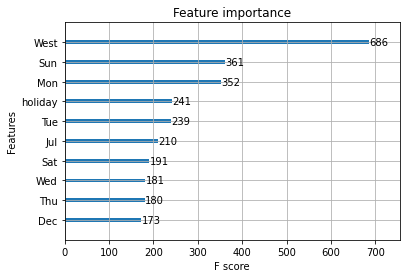

In [55]:
# show feature importance
xgb.plot_importance(model,max_num_features= 10)

From the graph above (please rerun above cell again if graph doesn't load), the machine learning model is consistent with our initial observations. The direction of travel, day of the week, and whether it was a holiday affected the traffic volume at Arizona Station 100115 the most. Additionally, the month of the year seems to affect the traffic flow as well.

Thank you for evaluating my mini analysis! :)